In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from linear_model import LinearModel


##### Проверьте работу модели с разными начальными значениями параметров. -
Параметрами,от которых зависит работа модели, являются:альфа, отвечающая за скорость обучения и количество итераций(шагов) обучения. При небольших значениях параметорв есть риск недообучения модели, что пагубно отразится на предсказаниях модели. При чрезмерно больших значениях альфа(например, 5, 10) будет перескакивать и не будет сходиться. От параметров a и b работа модели не зависит.


In [6]:
x = pd.read_csv("data/x.csv")['0']
y = pd.read_csv("data/y.csv")['0']
Z = pd.read_csv("data/x.csv")[['0', '1']]

##### Убедитесь, что модель всегда сходится к оптимуму. -
Модель будет всегда сходиться к оптимуму, но при определенном значении параметра альфа и количества итераций. Например, при текущих данных (* при увеличении ошибки скорость обучения уменьшается вдвое):

Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Ост

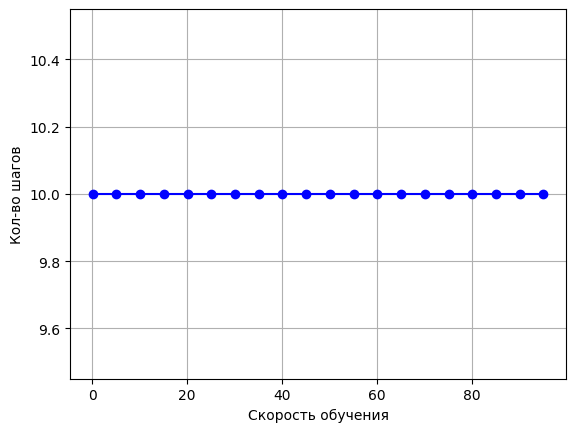

In [26]:
result = []
for i in np.arange(0.1, 100, 5):
    ALPHA = i
    model = LinearModel()
    steps = model.gradient_descent(x, y)
    result.append((steps, ALPHA))

steps, alphas = zip(*result)
plt.figure()
plt.plot(alphas, steps, marker='o', color='b')
plt.xlabel("Скорость обучения")
plt.ylabel("Кол-во шагов")
plt.grid(True)
plt.show()


In [8]:
ALPHA = 1
for i in np.arange(0, 100, 4):
    model = LinearModel()
    model.a = i
    model.b = i + 4
    steps = model.gradient_descent(x, y)


Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000003
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000003
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000003
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000003
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000003
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000002
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000002
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000002
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000002
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000002
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000002
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000001
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000001
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000001
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000001
Кол-во итераций: 10; Ост

##### Найдите значение, при котором градиентный спуск расходится.
Преобразуем код и получим ответ: при альфа равной двум

In [11]:
class Model:
    def __init__(self):
        self.a = 0
        self.b = 0

    def predict(self, x):
        # парная линейная регрессия y = a + b*x
        return self.a + self.b * x

    def fit(self, X, y, alpha) -> None:
        dJ0 = sum(self.predict(X) - y) / len(X)
        dJ1 = sum((self.predict(X) - y) * X) / len(X)
        self.a -= alpha * dJ0
        self.b -= alpha * dJ1

    def error(self, X, Y):
        """J = y_pred - y_true
        """
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def gradient_descent(self, x, y, alpha):
        step = 0
        err = self.error(x, y)
        errors = [err]
        while True:
            step += 1
            self.fit(x, y, alpha)
            last_err = self.error(x, y)
            errors.append(last_err)
            if abs(err - last_err) < pow(10, -6):
                break
            if last_err > err:  # Проверка на расходимость (ошибка стала слишком большой)
                return step, errors
            err = last_err
        print(f'Кол-во итераций: {step}; Остановлен при сумме ошибок: {last_err:.8f}')
        return step, errors




In [12]:
results = []
for i in range(0, 10):
    alpha = i
    model = Model()
    steps, errors = model.gradient_descent(x, y, alpha)
    results.append((alpha, steps, errors[-1]))
print(results)

Кол-во итераций: 1; Остановлен при сумме ошибок: 2937.64460952
Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004
[(0, 1, 2937.6446095153397), (1, 10, 4.177260836855173e-08), (2, 1, 6634.637075952659), (3, 1, 22200.215708308442), (4, 1, 46910.51594008897), (5, 1, 80765.53777129423), (6, 1, 123765.28120192428), (7, 1, 175909.74623197905), (8, 1, 237198.93286145857), (9, 1, 307632.8410903628)]


##### Модифицируйте код модели таким образом, чтобы можно было подавать вместо x - DataFrame.
##### Модифицируйте алгоритм градиентного спуcка таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
##### Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
##### Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.
##### Почитайте в документации про встроенный метод оценки качества регрессии score. Реализуйте такой же расчет в собственном классе модели.

In [13]:
model = LinearModel()

Кол-во итераций: 10; Остановлен при сумме ошибок: 0.00000004


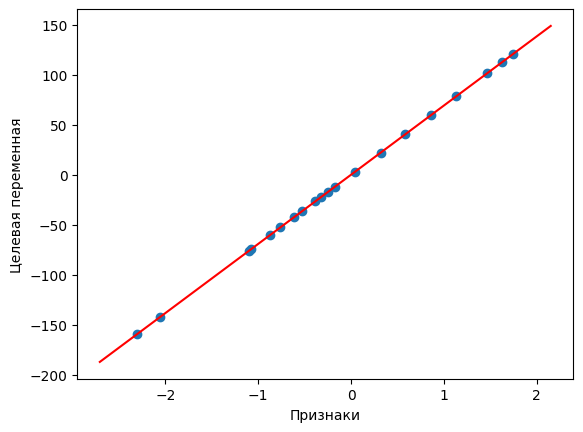

In [14]:
model.gradient_descent(x,  y)
model.show_plot(x, y)

In [15]:
model = LinearModel()
model.gradient_descent(Z, y)

Кол-во итераций: 65; Остановлен при сумме ошибок: 0.00000073


65

##### Изучите официальную документацию библиотеки sklearn. Постройте модель регрессии с использованием библиотечных средств на тех же данных. Постройте графики и сравните результаты.

In [16]:
lib_model = LinearRegression()
lib_model.fit(Z[["0"]], y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Свободный Коэффициент (a)

In [17]:
lib_model.intercept_

np.float64(0.0)

Коэффициент при x (b)

In [18]:
lib_model.coef_

array([69.1877114])

In [19]:
lib_model.score(Z[["0"]], y)

1.0

###### заметка - reshape((-1, 1)) - превращение любого массива в вектор-столбец

In [20]:
X = np.linspace(-3, 2, 100).reshape((-1, 1))
y_pred = lib_model.predict(X)

/home/aabdulgashimova/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


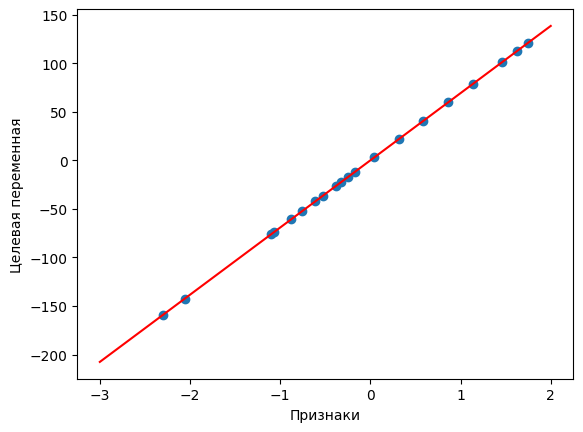

In [21]:
plt.figure()
plt.scatter(Z["0"], y)
plt.xlabel("Признаки")
plt.ylabel("Целевая переменная")
plt.plot(X, y_pred, "r")

##### score равный единице свидетельствует о наличии корреляции

In [22]:
lib_model.score(Z[["0"]], y)

1.0

In [23]:
mul_model = LinearRegression().fit(Z, y)
mul_model.score(Z, y)

1.0

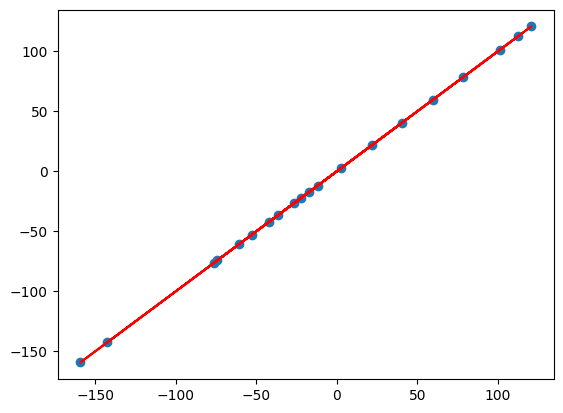

In [24]:
y_pred = mul_model.predict(Z)
plt.scatter(y_pred, y)
plt.plot(y, y, "r")

In [25]:
mul_model.coef_

array([ 6.91877114e+01, -2.75577608e-15])